# Abalone Case Study Project

### The idea of the project is to predict the rings of each abalone which will lead us to the age of that abalone

### Since our target variable is continuous we will have to apply Regression model to solve the problem statement

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv'

In [4]:
df=pd.read_csv(url)

In [5]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


We have only feature with object data, remaining has numeric values

In [7]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

There are no null values in the dataset

<AxesSubplot:>

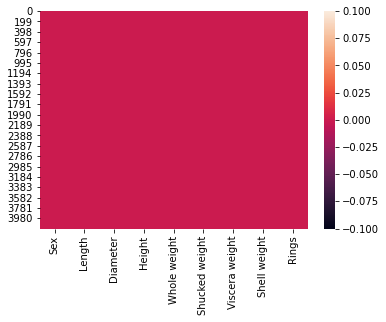

In [8]:
sns.heatmap(df.isnull())

In [9]:
missing_values = ["?",'--','']
df=pd.read_csv(url,na_values = missing_values)

In [10]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [11]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


As per attributes given Rings / integer / -- / +1.5 gives the age in years.

Hence we will change the column name of 'Rings' to 'Age' and will add 1.5 to each row.

In [12]:
df['Age'] = df['Rings']+1.5

In [13]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


We can see that we have added 1.5 value to the Rings to get the Age.
Now we will drop the "Rings" columns.

In [14]:
df.drop(['Rings'],axis=1,inplace=True)

In [15]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


## EDA

Lets see what is the distribution of Sex attributes in the dataset

In [16]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

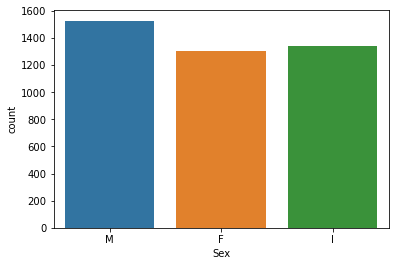

In [17]:
sns.countplot(x='Sex',data=df)

We have high number of males attributes followed by Infant.

<AxesSubplot:xlabel='Sex', ylabel='Age'>

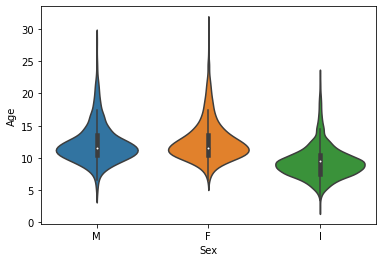

In [18]:
sns.violinplot(x='Sex', y='Age', data=df)

Male has an age range between 7 to 18years.
Female has an age range between 7 to 18years.
Infant has an age range between 5 to 13years.

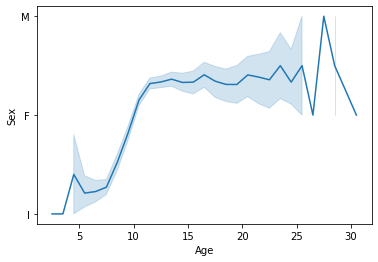

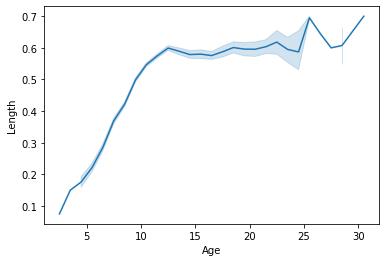

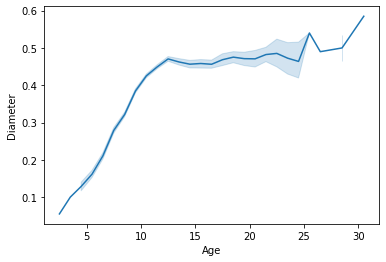

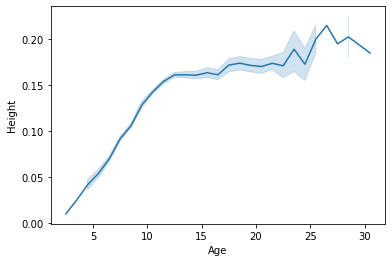

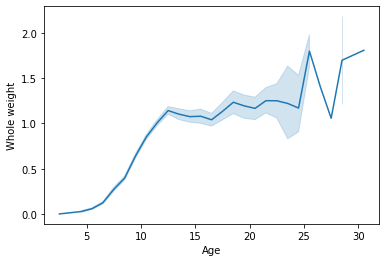

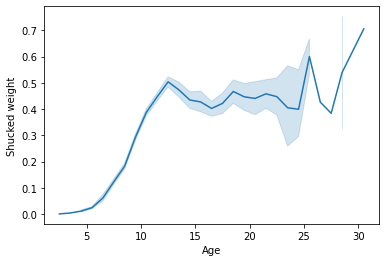

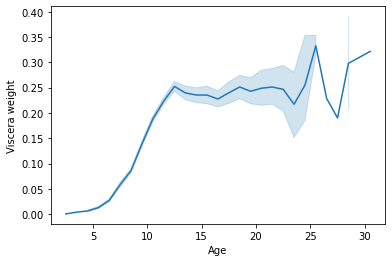

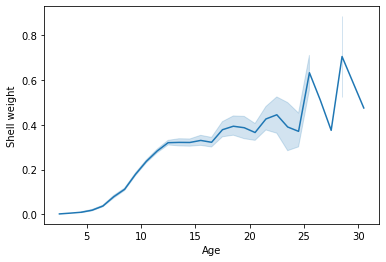

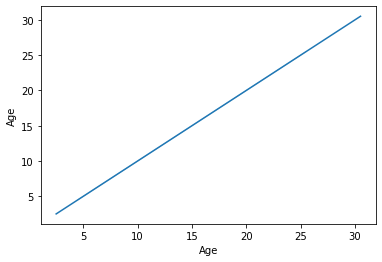

In [19]:
for i in df.columns:
    sns.lineplot(x='Age',y=i,data=df)
    plt.show()

We can se all the features have positive relation with the Age

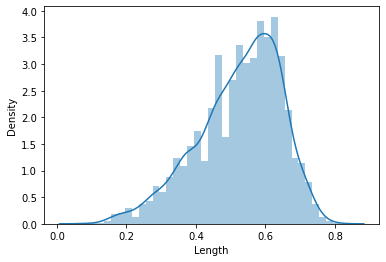

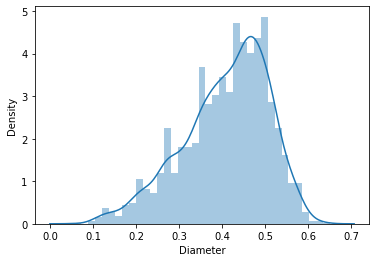

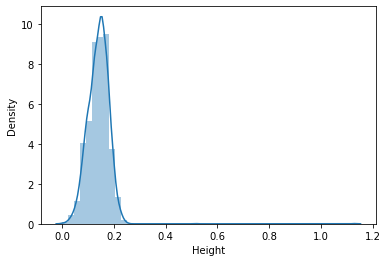

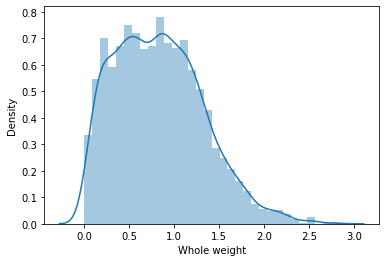

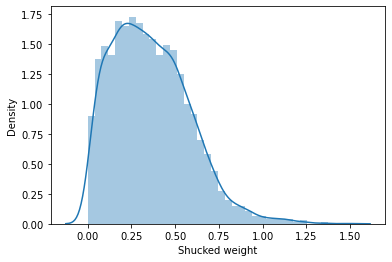

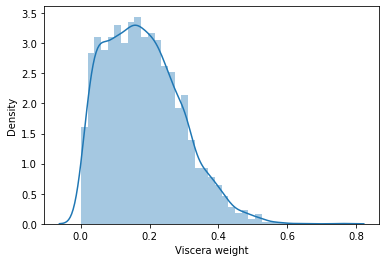

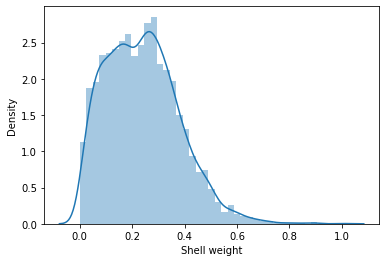

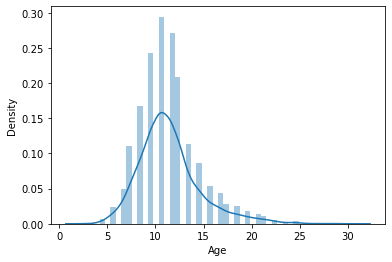

In [20]:
columns = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Age']
           
for i in columns:
           sns.distplot(df[i])
           plt.show()

Most of the data is skewed, though they are close to normality. Possible outliers in Height.

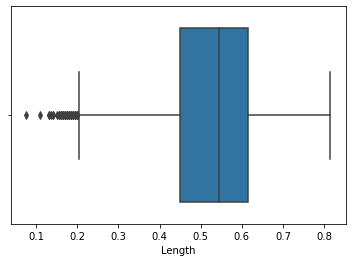

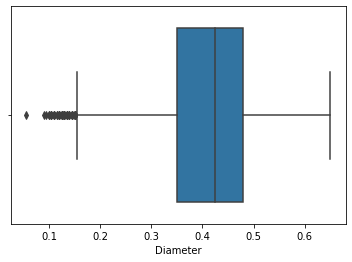

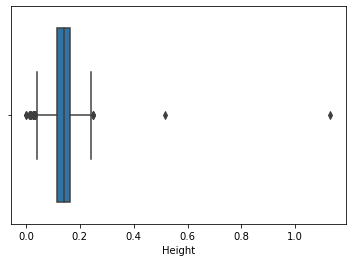

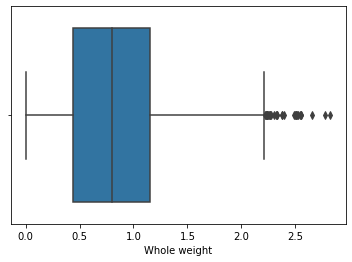

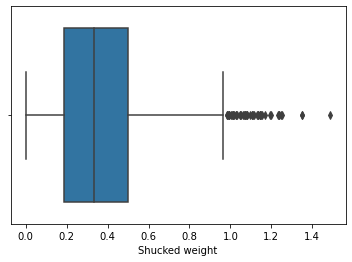

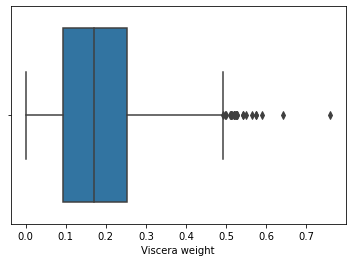

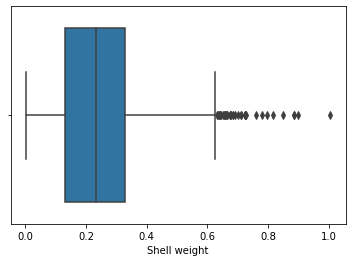

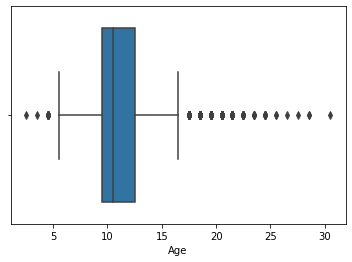

In [21]:
for i in columns:
    plt.subplots()
    sns.boxplot(df[i])

Barring length and diameter all our features has the outliers hence we have treat them before model fitting

### MultiVariate Analysis

<AxesSubplot:>

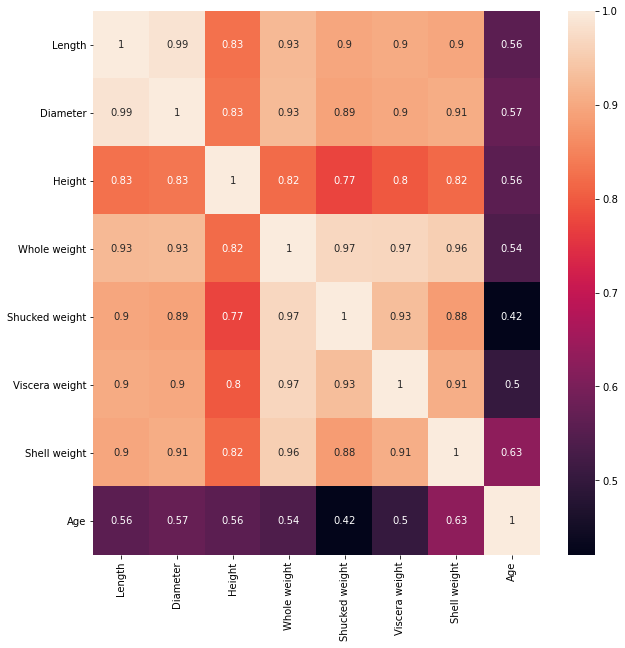

In [22]:
plt.figure(figsize=(10, 10))
corr = df.corr()
sns.heatmap(corr, annot=True)

Age has the highest co relation with Shell weight and least with Shucked weight.

Whole weight is highly corelated with all the features

Shell weight, Viscera weight, Shucked weight and whole weight are highly co related with each other.

We will see how our model will perform. We can also check our model performance with PCA

### Before model fitting

Use OrdinalEncoder on 'Sex' attribute to change the categorical data to numerical

Treat the data for outliers and skewness.

Standardize the data.

Can try PCA to check if the model will perform better with PCA

### Data Pre Processing

Splitting our data into input(x) and output(y) variable.

Using OrdinalEncoder on 'Sex' attribute to change the categorical data to numerical. We will import the necessary library

In [23]:
from sklearn.preprocessing import OrdinalEncoder

In [24]:
oe=OrdinalEncoder()

Transforming the required columns.

In [25]:
df[['Sex']]=oe.fit_transform(df[['Sex']])

In [26]:
df['Sex'].unique()

array([2., 0., 1.])

We can see the Female, Infant and Male has been changed to 0,1 and 2 respectively

In [27]:
df['Sex'].value_counts()

2.0    1528
1.0    1342
0.0    1307
Name: Sex, dtype: int64

Lets treat the outliers

In [28]:
df['Age'].value_counts()

10.5    689
11.5    634
9.5     568
12.5    487
8.5     391
13.5    267
7.5     259
14.5    203
15.5    126
6.5     115
16.5    103
17.5     67
18.5     58
5.5      57
19.5     42
20.5     32
21.5     26
4.5      15
22.5     14
24.5      9
23.5      6
25.5      2
28.5      2
3.5       1
30.5      1
2.5       1
27.5      1
26.5      1
Name: Age, dtype: int64

In [29]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.15198011, 0.57455813, 0.43214879, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.15198011, 1.44898585, 1.439929  , ..., 1.20522124, 1.21298732,
        0.91001299],
       [1.28068972, 0.05003309, 0.12213032, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [1.15198011, 0.6329849 , 0.67640943, ..., 0.97541324, 0.49695471,
        0.28962385],
       [1.28068972, 0.84118198, 0.77718745, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.15198011, 1.54905203, 1.48263359, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [30]:
df_new=df[(z<3).all(axis=1)]

In [31]:
print(df.shape)
print(df_new.shape)

(4177, 9)
(4027, 9)


In [32]:
100-((4027/4177)*100)

3.5910940866650662

We are losing 3.59% of the data after removing the outliers which is fine

In [33]:
df_new['Age'].value_counts()

10.5    686
11.5    625
9.5     566
12.5    472
8.5     391
7.5     258
13.5    251
14.5    199
15.5    119
6.5     113
16.5    102
17.5     62
18.5     53
5.5      49
19.5     39
20.5     32
4.5      10
Name: Age, dtype: int64

We have lost important data from Age while removing the outliers, hence we will not go forward with the same

Now lets check for skewness

In [34]:
x=df.drop(columns='Age')
y=df['Age']

In [35]:
x.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
dtype: float64

We have to treat skewness in Length, Diameter, Height and Shucked weight

In [36]:
x['Length']=np.square(x['Length'])
x['Diameter']=np.square(x['Diameter'])

In [37]:
x['Shucked weight']=np.sqrt(x['Shucked weight'])

In [39]:
x['Height']=np.sqrt(x['Height'])

In [40]:
x.skew()

Sex              -0.098155
Length           -0.068660
Diameter         -0.026554
Height           -0.295641
Whole weight      0.530959
Shucked weight   -0.141443
Viscera weight    0.591852
Shell weight      0.620927
dtype: float64

We have sucessfully removed the outliers and skewness. Lets check this with Histogram plot

array([[<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>]], dtype=object)

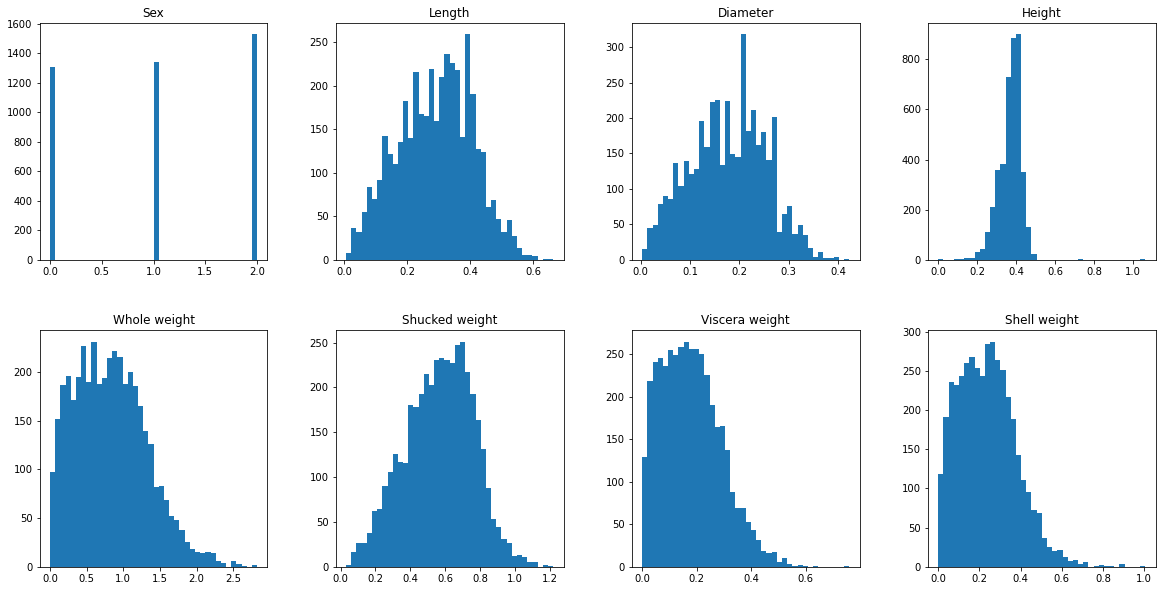

In [41]:
x.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 40)

Bingo!!

Now we will standardize our data as it has different scale.

We wil be using StandardScaler for the same.

Lets import the required library

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x)

In [43]:
sc_x

array([[ 1.15198011, -0.69410371, -0.56588297, ..., -0.4737027 ,
        -0.72621157, -0.63821689],
       [ 1.15198011, -1.40991617, -1.39519277, ..., -1.2824301 ,
        -1.20522124, -1.21298732],
       [-1.28068972, -0.06848236,  0.00245751, ..., -0.30701248,
        -0.35668983, -0.20713907],
       ...,
       [ 1.15198011,  0.60138768,  0.65043806, ...,  0.80848861,
         0.97541324,  0.49695471],
       [-1.28068972,  0.86074002,  0.77680907, ...,  0.82780925,
         0.73362741,  0.41073914],
       [ 1.15198011,  1.82171983,  1.73512261, ...,  2.07206731,
         1.78744868,  1.84048058]])

In [44]:
x=sc_x

### Model Preparation and Selection

Now we will move forward for model fitting

Importing the required libraries

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [46]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is: {r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is: {r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is: 0.4724879054289598
At random state 0,the testing accuracy is: 0.5103873141073607


At random state 1,the training accuracy is: 0.48722862572818304
At random state 1,the testing accuracy is: 0.45412371191521295


At random state 2,the training accuracy is: 0.4783193125753957
At random state 2,the testing accuracy is: 0.4830212920946242


At random state 3,the training accuracy is: 0.487730046358107
At random state 3,the testing accuracy is: 0.4498050179305143


At random state 4,the training accuracy is: 0.4851676809394837
At random state 4,the testing accuracy is: 0.45890640673942795


At random state 5,the training accuracy is: 0.4940717966353082
At random state 5,the testing accuracy is: 0.42755228593042127


At random state 6,the training accuracy is: 0.4694416577007686
At random state 6,the testing accuracy is: 0.5262267440771848


At random state 7,the training accuracy is: 0.47451020301357594
At random state 7,the testing accuracy is: 0

At random state 77,the training accuracy is: 0.475013425918818
At random state 77,the testing accuracy is: 0.505707664409378


At random state 78,the training accuracy is: 0.48575582258789773
At random state 78,the testing accuracy is: 0.4591559698360641


At random state 79,the training accuracy is: 0.4821295891980979
At random state 79,the testing accuracy is: 0.4730172626321034


At random state 80,the training accuracy is: 0.4838394514937301
At random state 80,the testing accuracy is: 0.4656503565552895


At random state 81,the training accuracy is: 0.46986534351414
At random state 81,the testing accuracy is: 0.5260418316529383


At random state 82,the training accuracy is: 0.47537391307948185
At random state 82,the testing accuracy is: 0.5030897742263447


At random state 83,the training accuracy is: 0.4860910385553926
At random state 83,the testing accuracy is: 0.4573435405426792


At random state 84,the training accuracy is: 0.4860528369651105
At random state 84,the testing accu

We will now split the data with the random_state 11 as that has given us the best accuracy on training and test data.

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=11)

In [56]:
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print('The training accuracy of LinearRegression is', train_score)
print('The test accuracy of LinearRegression is', test_score)

The training accuracy of LinearRegression is 0.4720302907041676
The test accuracy of LinearRegression is 0.5152793067174304


Fitting the data to SupportVectorRegression model

In [58]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.44472786665848396
0.3403960213971866
0.5522373036040029


Kernel 'rbf' has given us the best output, hence we will select 'rbf' for testing the model

In [59]:
sv=SVR(kernel='rbf')
sv.fit(x_train,y_train)
pred_train=sv.predict(x_train)
pred_test=sv.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print('The training accuracy of SVR is', train_score)
print('The test accuracy of SVR is', test_score)

The training accuracy of SVR is 0.5522373036040029
The test accuracy of SVR is 0.533655196433435


The accuracy has improved vastly from Linear regression.

Now lets check Decision Tree classifier model

In [60]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_train=dt.predict(x_train)
pred_test=dt.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print('The training accuracy of DT is', train_score)
print('The test accuracy of DT is', test_score)

The training accuracy of DT is 1.0
The test accuracy of DT is 0.128934152705812


The training accuracy of DTR is 1.0 however it faied in Test accuracy

Now Let's usd Random Forest Regressor model

In [62]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
train_score=r2_score(y_train,pred_train)
test_score=r2_score(y_test,pred_test)
print('The training accuracy of RF is', train_score)
print('The test accuracy of RF is', test_score)

The training accuracy of RF is 0.9350809160406661
The test accuracy of RF is 0.5583842443480213


Again this model has given us the best result on training model but huge difference on testing model.

### Cross Vaidation

We will cross validate our model

In [71]:
from sklearn.model_selection import cross_val_score

In [53]:
model=(lr,rf,dt,sv)
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print('Mean Accuracy of', m)
    print(score.mean())
    print('\n')

Mean Accuracy of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
0.3566103516156875


Mean Accuracy of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
0.43881033463383307


Mean Accuracy of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort=

SVR has given us the best cross val score of 43%

### HyperTuning

Importing libraries for hypertuning and Normalization

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [65]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [66]:
ls=Lasso(alpha=0.01,random_state=0)
ls.fit(x_train,y_train)
ls.score=(x_train,y_train)

In [68]:
parameters=[{'kernel': ['rbf'], 'gamma': [0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100]}]
clf1=GridSearchCV(SVR(),parameters)

In [60]:
clf1.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100],
                          'gamma': [0.01, 0.1, 0.2, 0.5, 0.6, 0.9],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [61]:
print(clf1.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


We will now fit the model with the above parameters

#It was taking lot of time if other parameters were added

In [73]:
Finalmod=SVR(C=10, gamma=0.1, kernel='rbf')
Finalmod.fit(x_train,y_train)
pred=Finalmod.predict(x_test)
acc=r2_score(y_test,pred)
cvscore=cross_val_score(Finalmod,x,y,cv=5)
print('Model Accuracy',acc*100)
print('Cross validation Accuracy',cvscore.mean()*100)

Model Accuracy 54.801183223694935
Cross validation Accuracy 51.64723716536087


### Conclusion

#### From SVR we are getting the Accuracy 54% and Cross_val score of 51%

Lets save this model

In [74]:
import joblib
joblib.dump(Finalmod,'Abalone_study.obj')

['Abalone_study.obj']